# **处理缺失值**

**机器学习和数据挖掘中所使用的数据，永远不可能是完美的。** 很多特征，对于分析和建模来说意义非凡，但对于实际收集数据的人却不是如此，因此数据挖掘之中，常常会有重要的字段缺失值很多，但又不能舍弃字段的情况。因此，数据预处理中非常重要的一项就是**处理缺失值。**

-----
我们采用从泰坦尼克号提取出来的数据，这个数据有三个特征，如下：

* Age 数值型    
* Sex 字符型   
* Embarked 字符型   

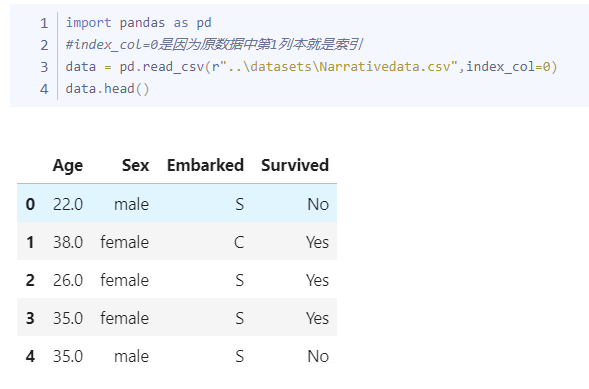

In [4]:
import pandas as pd
data = pd.read_csv("train.csv",index_col=0)
data = data[['Age','Sex','Embarked','Survived']]
data.reset_index(drop=True,inplace=True)
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,1
2,26.0,female,S,1
3,35.0,female,S,1
4,35.0,male,S,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 28.0+ KB


### **缺失值填补 impute.SimpleImputer**

In [ ]:
class sklearn.impute.SimpleImputer (
                                    missing_values=nan, 
                                    strategy='mean', 
                                    fill_value=None, 
                                    verbose=0,
                                    copy=True
                                    )

这个类是专门用来填补缺失值的。它包括四个重要参数：

* missing_values    
告诉SimpleImputer，数据中的缺失值长什么样，默认空值np.nan

* strategy      
我们填补缺失值的策略，默认均值    
输入"mean"使用均值填补（仅对数值型特征可用）   
输入"median"用中值填补（仅对数值型特征可用）    
输入"most_frequent"用众数填补（对数值型和字符型特征都可用）   
输入"constant"表示请参考参数"fill_value"中的值（对数值型和字符型特征都可用）      

* fill_value     
当参数startegy为"constant"的时候可用，可输入字符串或数字表示要填充的值，常用0  

* copy
默认为True，将创建特征矩阵的副本，反之则会将缺失值填补到原本的特征矩阵中去


In [8]:
Age = data.loc[:,"Age"].values.reshape(-1,1) #sklearn当中特征矩阵必须是二维
Age[:5]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.]])

In [9]:
#填补年龄, 分别用均值、中位数、0填补
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer() #实例化,默认均值填补
imp_median = SimpleImputer(strategy="median") #用中位数填补
imp_0 = SimpleImputer(strategy="constant",fill_value=0) #用0填补

In [10]:
#fit_transform一步完成调取结果
imp_mean = imp_mean.fit_transform(Age) #均值填补
imp_median = imp_median.fit_transform(Age) #中值填补
imp_0 = imp_0.fit_transform(Age) # 使用0填补

In [11]:
imp_mean[:20] # 查看用均值填补后的前20条数据

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ],
       [ 4.        ],
       [58.        ],
       [20.        ],
       [39.        ],
       [14.        ],
       [55.        ],
       [ 2.        ],
       [29.69911765],
       [31.        ],
       [29.69911765]])

In [13]:
imp_median[:20] # 查看用中值填补后的前20条数据

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [28.],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [28.],
       [31.],
       [28.]])

In [14]:
imp_0[:20] # 查看用0填补后的前20条数据

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [ 0.],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [ 0.],
       [31.],
       [ 0.]])

In [15]:
data.loc[:,'Age'] = imp_median
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 28.0+ KB


用众数填补Embarked：

In [16]:
#使用众数填补Embarked
Embarked = data.loc[:,"Embarked"].values.reshape(-1,1)
imp_mode = SimpleImputer(strategy = "most_frequent")
data.loc[:,"Embarked"] = imp_mode.fit_transform(Embarked)


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  891 non-null    object 
 3   Survived  891 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 28.0+ KB


**用Pandas和Numpy进行填补其实更加简单**

In [18]:
import pandas as pd
data = pd.read_csv("train.csv",index_col=0)
data = data[['Age','Sex','Embarked','Survived']]
data.reset_index(drop=True,inplace=True)
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,1
2,26.0,female,S,1
3,35.0,female,S,1
4,35.0,male,S,0


In [19]:
data.loc[:,"Age"] = data.loc[:,"Age"].fillna(data.loc[:,"Age"].median())
#.fillna 在DataFrame里面直接进行填补
data.dropna(axis=0,inplace=True)
#.dropna(axis=0)删除所有有缺失值的行，.dropna(axis=1)删除所有有缺失值的列
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       889 non-null    float64
 1   Sex       889 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  889 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 34.7+ KB
